Acurácia: 0.6666666666666666
Matriz de Confusão:
 [[1 0]
 [1 1]]
Relatório de Classificação:
               precision    recall  f1-score   support

         Não       0.50      1.00      0.67         1
         Sim       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



C:\Users\larin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


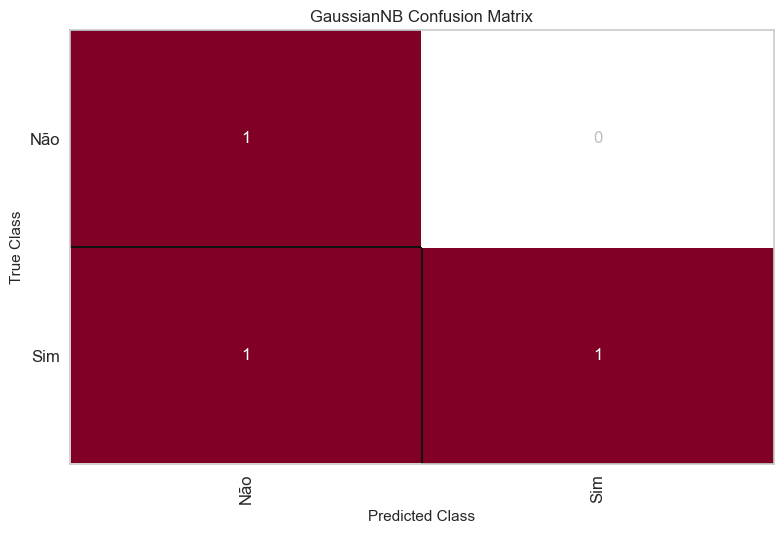

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

# Carregar sua base de dados específica
data = pd.read_csv('jogar_ou_nao_jogar.csv')

# Supondo que 'Jogar' seja a coluna de rótulos e as outras colunas sejam os atributos
X = data.drop('Jogar', axis=1)
y = data['Jogar']

# Codificar todas as variáveis categóricas, se necessário
X_encoded = pd.get_dummies(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, previsoes))
print("Matriz de Confusão:\n", confusion_matrix(y_test, previsoes))
print("Relatório de Classificação:\n", classification_report(y_test, previsoes))

# Visualizar a matriz de confusão com Yellowbrick
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

# Visualizar o relatório de classificação com Yellowbrick
# Substitua 'classes' pelos nomes das classes em sua base de dados
# classes = ['Não', 'Sim']
# cr = ClassificationReport(modelo, classes=classes)
# cr.fit(X_train, y_train)
# cr.score(X_test, y_test)
# cr.show()